In [1]:
import pandas, seaborn
import os

In [2]:
files = os.listdir('./output/')
filepaths = [f"./output/{i}" for i in files]
filepaths

['./output/._pseudo_labels_HiLoFreq_Conf_subclass.csv',
 './output/ref_pseudo_labels_count_family.csv',
 './output/._result_seed80_HC_GSE109379_123456.csv',
 './output/result_RF_family_seed40_GSE109379_rand123456.csv',
 './output/result_NN_balanced_Class_seed20_GSE109379_rand123456.csv',
 './output/result_family_seed2_GSE109379_123456.csv',
 './output/result_RF_family_seed320_GSE109379_rand123456.csv',
 './output/result_RF_family_seed20_GSE109379_rand123456.csv',
 './output/result_RF_LCfamily_seed2_GSE109379_rand123456.csv',
 './output/all_seed_metrics_summary.csv',
 './output/._seed1_pseudo_labels_family_summary.xls',
 './output/all_seed_pseudo_label_family_summary.xls',
 './output/result_RF_subClass_seed2_GSE109379_rand123456.csv',
 './output/all_seeds_RF+NN_balanced_family_summary.csv',
 './output/all_seeds_NN_subclass_summary.csv',
 './output/result_NN_balanced_family_seed320_GSE109379_rand123456.csv',
 './output/all_seeds_RF_balanced_LCfamily_summary.csv',
 './output/result_RF_LCs

In [10]:
dfs = [pandas.read_csv('./output/result_RF_LCsubClass_seed{}_GSE109379_rand123456.csv'.format(s)) for s in [1,2,20,40,80,160,320]]
#dfs = [pandas.read_csv(f) for f in filepaths]
df = pandas.concat(dfs)
df
df.to_csv('./output/all_seeds_RF_balanced_LCsubclass_summary.csv', index=False)

In [4]:
dfs = [pandas.read_csv('./output/result_RF_LCfamily_seed{}_GSE109379_rand123456.csv'.format(s)) for s in [1,2,20,40,80,160,320]]
#dfs = [pandas.read_csv(f) for f in filepaths]
df = pandas.concat(dfs)
df
df.to_csv('./output/all_seeds_RF_balanced_LCfamily_summary.csv', index=False)

In [9]:
dfs = [pandas.read_csv('./output_acc_perFamily/result_RF_acc_perLCFamily_seed{}_GSE109379_rand123456.csv'.format(s)) for s in [1,2,20,40,80,160,320]]
#dfs = [pandas.read_csv(f) for f in filepaths]
df = pandas.concat(dfs)
df
df.to_csv('./output_acc_perFamily/all_seeds_RF_bacc_perLCFamily.csv', index=False)

In [6]:
dfs = [pandas.read_csv('./output_acc_perClass/result_RF_acc_perLCClass_seed{}_GSE109379_rand123456.csv'.format(s)) for s in [1,2,20,40,80,160,320]]
#dfs = [pandas.read_csv(f) for f in filepaths]
df = pandas.concat(dfs)
df
df.to_csv('./output_acc_perClass/all_seeds_RF_bacc_perLCClass.csv', index=False)

In [12]:
dfs = [pandas.read_csv('./output/result_NN_balanced_LCClass_seed{}_GSE109379_rand123456.csv'.format(s)) for s in [1,2,20,40,80,160,320]]
#dfs = [pandas.read_csv(f) for f in filepaths]
df = pandas.concat(dfs)
df
df.to_csv('./output/all_seeds_NN_balanced_LCsubclass_summary.csv', index=False)

In [14]:
dfs = [pandas.read_csv('./output/result_NN_balanced_LCfamily_seed{}_GSE109379_rand123456.csv'.format(s)) for s in [1,2,20,40,80,160,320]]
#dfs = [pandas.read_csv(f) for f in filepaths]
df = pandas.concat(dfs)
df
df.to_csv('./output/all_seeds_NN_balanced_LCfamily_summary.csv', index=False)

In [15]:
dfs = [pandas.read_csv('./output_acc_perFamily/result_NN_balanced_acc_perLCFamily_seed{}_GSE109379_rand123456.csv'.format(s)) for s in [1,2,20,40,80,160,320]]
#dfs = [pandas.read_csv(f) for f in filepaths]
df = pandas.concat(dfs)
df
df.to_csv('./output_acc_perFamily/all_seeds_NN_bacc_perLCFamily.csv', index=False)

In [17]:
dfs = [pandas.read_csv('./output_acc_perClass/result_NN_bal_acc_perLCClass_seed{}_GSE109379_rand123456.csv'.format(s)) for s in [1,2,20,40,80,160,320]]
#dfs = [pandas.read_csv(f) for f in filepaths]
df = pandas.concat(dfs)
df
df.to_csv('./output_acc_perClass/all_seeds_NN_bacc_perLCClass.csv', index=False)

In [60]:
df_ba.Dataset.value_counts(), df_ba.Seed.value_counts()

(HC GSE90490 + GSE109379    14
 70%                        14
 HC                         14
 35% + GSE109379            14
 35%                        14
 70HC + GSE109379           14
 70% + GSE109379            14
 Name: Dataset, dtype: int64,
 80     14
 320    14
 40     14
 160    14
 20     14
 2      14
 1      14
 Name: Seed, dtype: int64)

In [61]:
test = df_ba[(df_ba.Seed==1) & (df_ba.Dataset=='35%')]

In [62]:
test

,Seed,Dataset,Validation,Metric,Value
0,1,35%,cross_val,balanced_acc,0.710
4,1,35%,vs_testset,balanced_acc,0.878


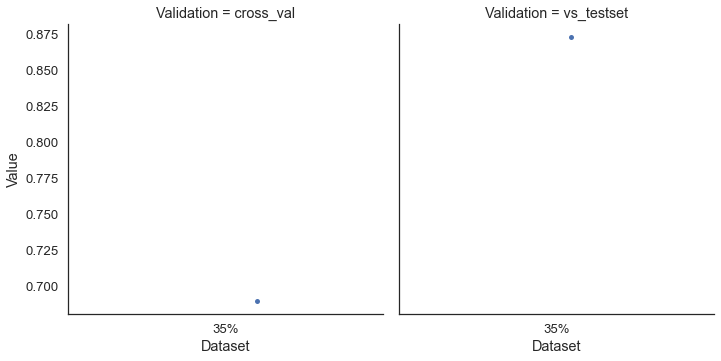

In [81]:
seaborn.catplot(data=test, x='Dataset', y='Value', col='Validation')

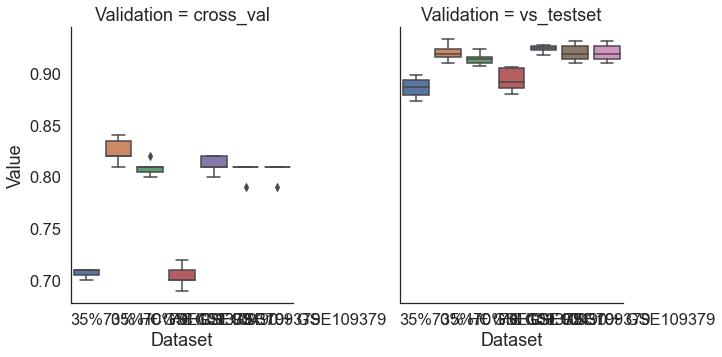

In [63]:
seaborn.catplot(data=df_ba, x='Dataset', y='Value', kind='box', col='Validation')

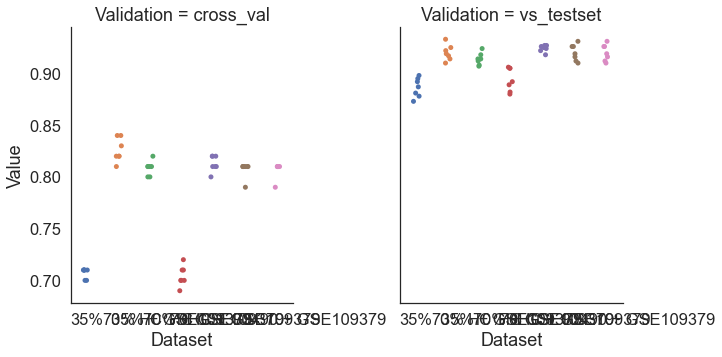

In [64]:
seaborn.catplot(data=df_ba, x='Dataset', y='Value', kind='strip', col='Validation')

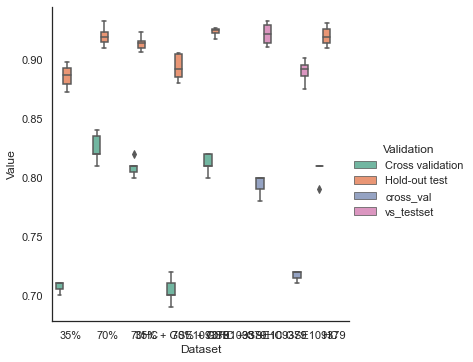

In [84]:
seaborn.catplot(data=df_ba, x='Dataset', y='Value', kind='box',  hue='Validation', palette='Set2')

In [85]:
df.Validation = df.Validation.replace('cross_val','Cross validation')
df.Validation = df.Validation.replace('vs_testset','Hold-out test')


In [71]:
df.Dataset = df.Dataset.replace('HC GSE90490 + GSE109379', 'HC')

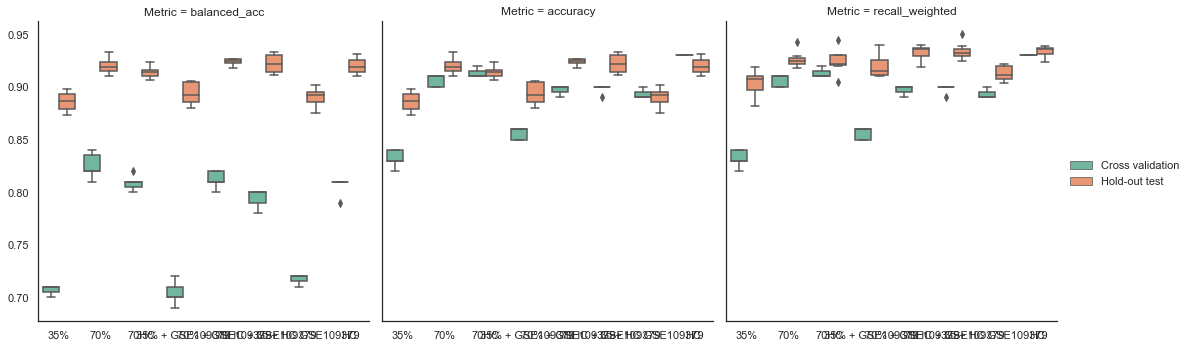

In [83]:
seaborn.set(font_scale=1)
seaborn.set_style('white')
fig = seaborn.catplot(data=df, x='Dataset', y='Value', kind='box',  hue='Validation', col='Metric', col_wrap=3, palette='Set2',
                     legend=False)
fig.set_axis_labels('','')
fig.add_legend()
#import matplotlib.pyplot as plt
#plt.legend(title = '', loc='outside', labels=['Cross Validation', 'Hold-out Test'])
#plt.show(fig)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


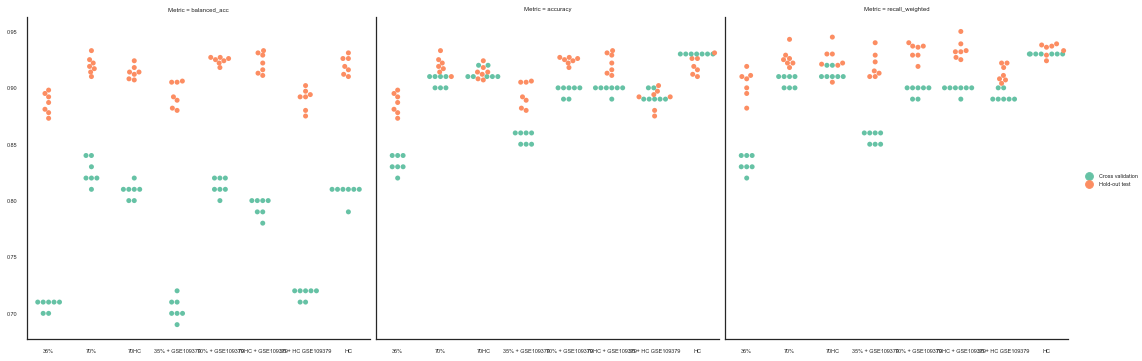

In [82]:
fig=seaborn.catplot(data=df, x='Dataset', y='Value', kind='swarm',  hue='Validation', col='Metric', col_wrap=3, palette='Set2', legend=False)
fig.set_axis_labels('','')
fig.add_legend()

import matplotlib.pyplot as plt
#fig.plt.legend(loc='lower center')
#plt.savefig('box_plots_RF.png', dpi=150)


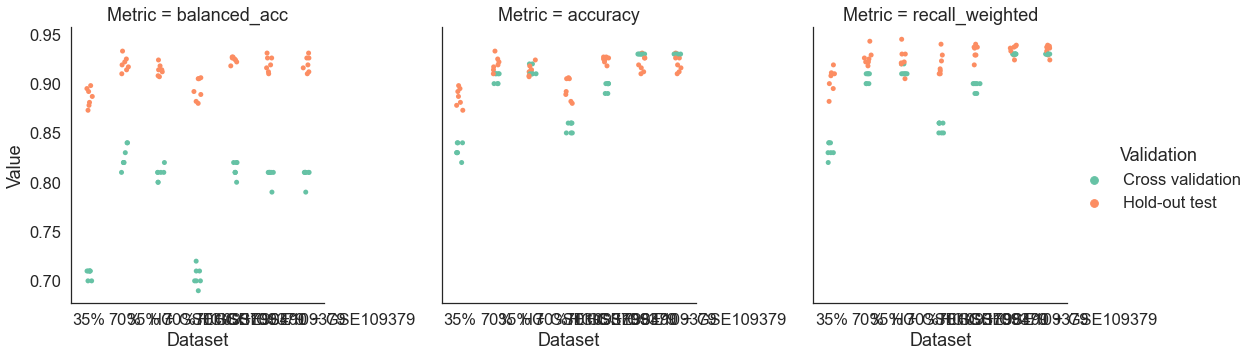

In [69]:
seaborn.catplot(data=df, x='Dataset', y='Value', kind='strip',  hue='Validation', col='Metric', col_wrap=3, palette='Set2')